In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('usa_mercedes_benz_prices.csv')

df = df.dropna()
df = df.drop(['Mileage', 'Price'], axis=1)

feature1 = df.iloc[:, 1]
feature2 = df.iloc[:, 2]

In [24]:
# normalisation par la moyenne et l'écart type
feature1 = (feature1 - np.mean(feature1)) / np.std(feature1)
feature2 = (feature2 - np.mean(feature2)) / np.std(feature2)

print(df.head())

                                        Name  Rating  Review
0    2021 Mercedes-Benz A-Class A 220 4MATIC     3.9  1800.0
1          2022 Mercedes-Benz AMG SL 63 Base     4.7  1239.0
2          2022 Mercedes-Benz AMG SL 63 Base     4.7  1239.0
3    2020 Mercedes-Benz AMG E 53 Base 4MATIC     4.8   752.0
4  2021 Mercedes-Benz AMG GLS 63 Base 4MATIC     5.0  1502.0


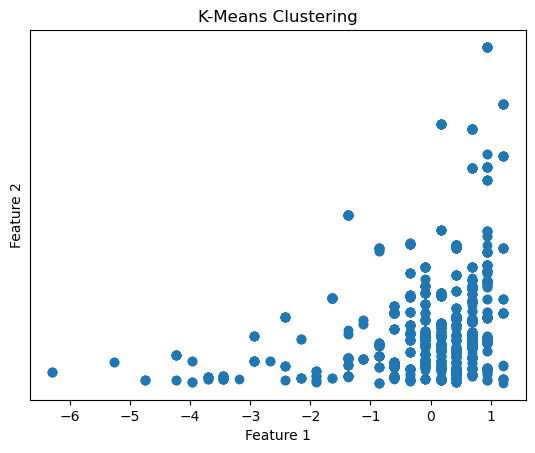

In [25]:
plt.scatter(feature1, feature2)

# Labeling the axes and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')

# Remove values on the y-axis
plt.yticks([])

# Display the plot
plt.show()

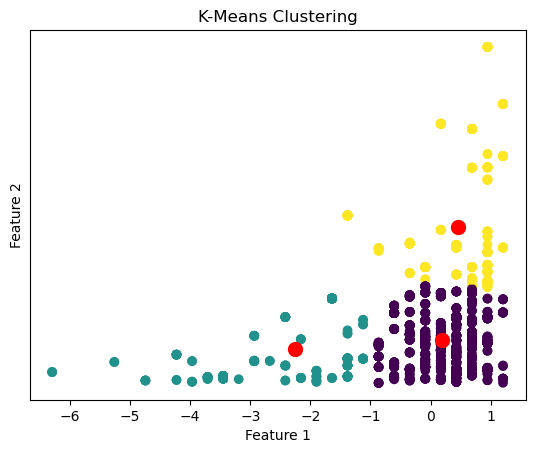

In [26]:
# creation de l'algorithme kmeans classique sans max iteration
def kmeans(X, k):
    # 1. Sélectionner K clusters initiaux contenant des objets choisis arbitrairement
    centroids = X[np.random.choice(range(X.shape[0]), size=k, replace=False)]

    while True:
        # 2. Calculer les centres des clusters
        # 4. Générer une nouvelle partition en affectant chaque objets au cluster du centre le plus proche
        labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2), axis=1)

        # 5. Calculer les nouveaux centres des clusters
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        # 6. Répéter 3 et 5 jusqu’à ce que les objets se stabilisent dans leurs clusters
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return labels, centroids

# application de l'algorithme kmeans
labels, centroids = kmeans(np.array([feature1, feature2]).T, 3)

# affichage des clusters
plt.scatter(feature1, feature2, c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.yticks([])
plt.show()

In [ ]:
# creation de l'algorithme kmeans amélioré sans max iteration
